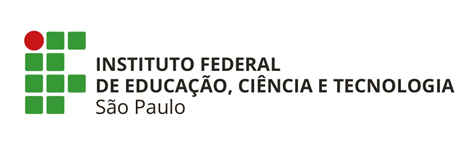

<h1><center>Projeto Interdisciplinar</center></h1>
<br>

<h3><center>INTRODUÇÃO A CIÊNCIA DE DADOS (D1INT)</center></h3>
<br>

<h3><center>Pós Graduação – Ciência de Dados
<br>
Professor: Everton Silva</center></h3>

<br>
<br>

<h4><right>Ede Miranda Júnior – CP3013596
<br>
Eduardo Mendes Oliveira – CP301360X
<br>Vitor Felipe Facanali Godoy – CP3013669</right></h4>
<br>
<br>

<h3><center>Campinas, São Paulo</center></h3>





# Introdução

A doença cardíaca é uma das causas de mortalidade mais frequentes no mundo hoje. Segundo a OMS, doenças do coração são a causa número um de mortes no mundo, matando mais de 17 milhões de pessoas todos os anos¹, enquanto no brasil, o número de mortos é de 70 mil pessoas ao ano².

A previsão de doenças cardiovasculares é um desafio crítico na área de análise de dados clínicos. É difícil identificar doenças cardíacas por causa de vários fatores de risco contribuintes, como diabetes, hipertensão, colesterol alto, pulso anormal e muitos outros fatores.

Tradicionalmente, a medicina dependia apenas da discrição aconselhada pelos médicos. Por exemplo, um médico teria que sugerir tratamentos adequados com base nos sintomas de um paciente e análises de exames isolados. Isso nem sempre resultou em diagnósticos corretos e eram propensos a erros humanos. Mas com os avanços nos computadores e, em particular, na Ciência de Dados, agora é possível obter medidas de diagnóstico precisas. 

Existem inúmeros campos na área da saúde, como imagem médica, descoberta de medicamentos, genética, diagnóstico preditivo e vários outros que fazem uso da ciência de dados. 
Há vários casos de sucesso em que a ciência de dados e a IA tem desempenhado um papel enorme na detecção de doenças em um estágio inicial. Por exemplo na Universidade de Campinas, em que pesquisadores desenvolveram uma plataforma de IA que pode diagnosticar o vírus Zika usando marcadores metabólicos. 

A ciência de dados tem muitas aplicações em saúde. A indústria de medicina e saúde tem utilizado fortemente a Ciência de Dados para melhorar o estilo de vida dos pacientes e prever doenças em um estágio inicial.
Partindo desse contexto, para esse trabalho serão analisadas pessoas que tiveram e não tiveram ataques cardíacos com idades entre 29 e 77 anos possuindo ou não sintomas e doenças pré-existentes como, pressão alta, colesterol e diabetes com intuito de prever novos casos.

Para isso, utilizaremos o dataset Heart Attack Analysis & Prediction³, disponível na plataforma Kaggle, o qual possui 303 amostras com 14 diferentes parâmetros, como sexo, idade, nível de colesterol, nível de açúcar no sangue em jejum, pressão arterial, anomalias em exames eletrocardiográficos, entre outros. 

Conseguindo determinar que uma pessoa ou um grupo de pessoas possuem maiores chances de desenvolver doenças cardíacas ao longo da vida, é possível realizar tratamentos preventivos a fim de evitá-las, sendo uma questão de grande relevância à saúde pública de modo geral.



#Carregamento das bibliotecas e dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, log_loss, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Semestre 1/PI/archive/heart.csv')
df_copy = pd.read_csv('/content/drive/MyDrive/Semestre 1/PI/archive/heart.csv')

#Entendendo os dados

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Este é um conjunto de dados de fácil entendimento. Mas o significado de algumas colunas não é tão óbvio. Abaixo está listado o significado de cada coluna, e o que cada tipo de dado representa (Essas informações foram obtidas na comunidade do [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843) e no repositório da [Universidade de Irvine](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)):

1. age - idade em anos

2. sex - sexo (1 = masculino; 0 = feminino)

3. cp - tipo de dor torácica (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática)

4. trtbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)

5. chol - colestoral LDL em mg / dl

6. fbs - açúcar no sangue em jejum > 120 mg / dl (1 = verdadeiro; 0 = falso)

7. restecg - resultados eletrocardiográficos em repouso (0 = normal; 1 = tendo anormalidade da onda ST-T; 2 = hipertrofia ventricular esquerda)

8. thalachh - frequência cardíaca máxima alcançada

9. exng - angina induzida por exercício (1 = sim; 0 = não)

10. oldpeak - supradesnivelamento de ST induzida por exercícios em relação ao repouso (Mais informações [aqui](https://www.sanarmed.com/supradesnivelamento-de-st-diagnosticos-diferenciais-colunistas))

11. slp - a inclinação do segmento ST de pico do exercício (2 = inclinação ascendente; 1 = plana; 0 = inclinação descendente)

12. caa - número de vasos principais (0-3) coloridos por fluorosopia

13. thal - Talessemia (2 = normal; 1 = defeito corrigido; 3 = defeito reversível; 0 = nulo)

14. output - o atributo previsto - diagnóstico de doença cardíaca (estado da doença angiográfica) (0 = estreitamento do diâmetro menor que 50%; 1 = estreitamento do diâmetro maior que 50%)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Pré-processamento

As colunas foram renomeadas para melhor compreensão

In [ ]:
df.columns = ['idade', 'sexo', 'dor_peito', 'pressao_sanguinea', 'colesterol', 'acucar_sangue', 'eletro', 'freq_cardiaca',
       'angina_induzida_ex', 'suprades_st', 'incli_st', 'num_vasos', 'talassemia', 'saida']

As colunas com valores categóricos tiveram seus dados convertidos para melhor visualização

In [ ]:
df['sexo'][df['sexo'] == 0] = 'feminino'
df['sexo'][df['sexo'] == 1] = 'masculino'

df['dor_peito'][df['dor_peito'] == 0] = 'assintomatica'
df['dor_peito'][df['dor_peito'] == 1] = 'angina tipica'
df['dor_peito'][df['dor_peito'] == 2] = 'angina atipica'
df['dor_peito'][df['dor_peito'] == 3] = 'dor nao aginosa'

df['acucar_sangue'][df['acucar_sangue'] == 0] = 'menor que 120mg/ml'
df['acucar_sangue'][df['acucar_sangue'] == 1] = 'maior que 120mg/ml'

df['eletro'][df['eletro'] == 0] = 'normal'
df['eletro'][df['eletro'] == 1] = 'anormalidade da onda ST-T'
df['eletro'][df['eletro'] == 2] = 'hipertrofia ventricular esquerda'

df['angina_induzida_ex'][df['angina_induzida_ex'] == 0] = 'nao'
df['angina_induzida_ex'][df['angina_induzida_ex'] == 1] = 'sim'

df['incli_st'][df['incli_st'] == 0] = 'inclinação descendente'
df['incli_st'][df['incli_st'] == 1] = 'plana'
df['incli_st'][df['incli_st'] == 2] = 'inclinação ascendente'

df['talassemia'][df['talassemia'] == 0] = ''
df['talassemia'][df['talassemia'] == 1] = 'defeito corrigido'
df['talassemia'][df['talassemia'] == 2] = 'normal'
df['talassemia'][df['talassemia'] == 3] = 'defeito reversível'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main_

O dataframe principal foi divido em dois outros dataframes com base no sexo dos pacientes

In [ ]:
homens = df.loc[df['sexo']=='masculino']
mulheres = df.loc[df['sexo']=='feminino']

#Análise dos dados

Para a análise dos dados foram utilizados gráficos e tabelas.

Para os casos em que houve diagnóstico positivo para doença cardíaca, o número foi maior para homens do que para mulheres.

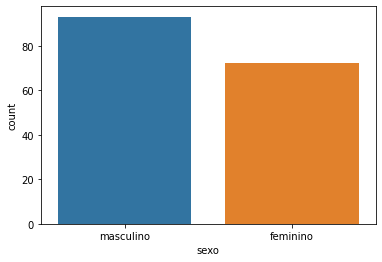

In [ ]:
tendencia_infarto = df.loc[df['saida']==1]
sem_tendencia_infarto = df.loc[df['saida']==1]
sns.countplot(data=tendencia_infarto, x='sexo')

Houve uma incidência maior de casos com diagnóstico positivo para as mulheres entre 50 e 65 anos.

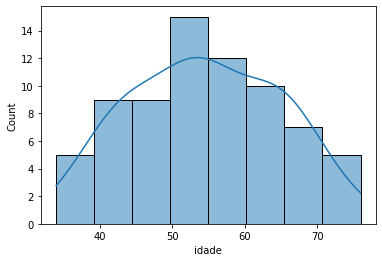

In [ ]:
tendencia_infarto_mulheres = mulheres.loc[mulheres['saida']==1]
sns.histplot(data = tendencia_infarto_mulheres, x='idade', kde=True)

Enquanto que para os homens houve um aumento a partir de 40 anos, e uma queda entre 45 e 50 anos, aumentando novamente a partir de 50 até 60 anos.

Para os homens o ínicio dos casos começam mais cedo, pouco antes dos 30 anos, já há casos positivos.

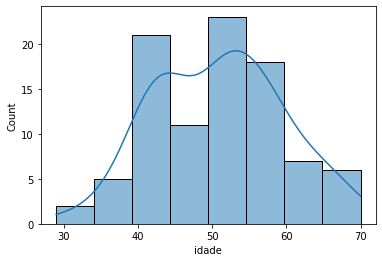

In [ ]:
tendencia_infarto_homens = homens.loc[homens['saida']==1]
sns.histplot(data = tendencia_infarto_homens, x='idade', kde=True)

O tipo de dor torácica frequentemente sentida pelas pessoas com casos positivos para doença cardíaca foi o de "angina atípica".

A angina ocorre quando a carga do trabalho cardíaco e a resultante demanda de oxigênio pelo miocárdico superam a capacidade das artérias coronárias de suprir uma quantidade adequada de sangue oxigenado.

A angina pode ser estável (típica) ou instável (atípica).

Na angina estável, a relação entre carga de trabalho ou demanda e isquemia é, com frequência, relativamente previsível.

Já a angina instável é angina com piora clínica (p. ex., angina em repouso ou aumento da frequência e/ou intensidade dos episódios)(Sweis, 2018).


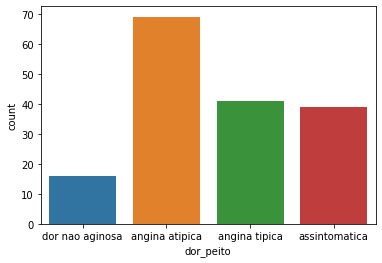

In [ ]:
sns.countplot(data=tendencia_infarto, x='dor_peito')

-----------

Nos casos com diagnóstico de doença cardíaca, as mulheres apresentaram um número mais elevado de colesterol LDL em relação ao homem. Isso se intensifica a partir dos 50 anos.

Em geral, as mulheres têm níveis mais elevados de colesterol HDL do que os homens porque o hormônio sexual feminino estrogênio aumenta esse colesterol bom. Mas na menopausa muitas mulheres experimentam uma mudança em seus níveis de colesterol - o colesterol total e o LDL aumentam e o HDL diminui (MICHOS, 2020).

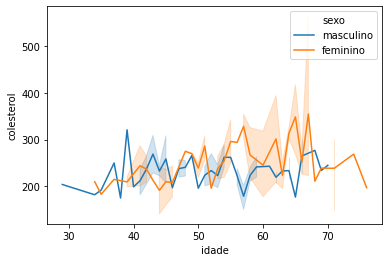

In [ ]:
sns.lineplot(data=tendencia_infarto, x='idade', y='colesterol', hue='sexo')

A média do colesterol LDL nas mulheres foi 25,8 vezes maior que nos homens

In [ ]:
colesterol_grouped = tendencia_infarto.groupby('sexo').mean('colesterol').reset_index()
colesterol_grouped[['sexo','colesterol']]

,sexo,colesterol
0,feminino,256.750000
1,masculino,230.989247


In [ ]:
dif_colesterol = colesterol_grouped.iloc[0]['colesterol']-colesterol_grouped.iloc[1]['colesterol']
print(np.round(dif_colesterol,1))

25.8


Mesmo nos casos que foram negativos para o diagnóstico de doença cardíaca, a diferença da média do colesterol LDL das mulheres foi ainda maior que nos homens.

Isso corrobora com os estudos já existentes que mulheres tem maior tendencia a infartos que homens, pois isso se agrava ao decorrer do tempo devido à menopausa.


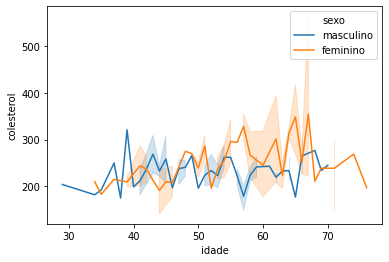

In [ ]:
sns.lineplot(data=sem_tendencia_infarto, x='idade', y='colesterol', hue='sexo')

In [ ]:
sem_tendencia_infarto = df.loc[df['saida']==0]
colesterol_grouped2 = sem_tendencia_infarto.groupby('sexo').mean('colesterol').reset_index()
colesterol_grouped2[['sexo','colesterol']]

,sexo,colesterol
0,feminino,274.958333
1,masculino,246.061404


A diferença da média do colesterol em mulheres para homens foi de 28.9

In [ ]:
dif_colesterol2 = colesterol_grouped2.iloc[0]['colesterol']-colesterol_grouped2.iloc[1]['colesterol']
print(np.round(dif_colesterol2,1))

28.9


Para os casos com diagnóstico positivo a anormalidade da onda ST-T foi a mais frequente.

O segmento ST é um elemento muito importante na avaliação das síndromes coronarianas agudas, uma vez que a oclusão total ou parcial de um vaso coronariano (ou um de seus ramos) implica em redução do fluxo sanguíneo para determinada região do coração, alterando a atividade elétrica dessa região, portanto, gerando alterações no eletrocardiograma (WEBER, 2021).


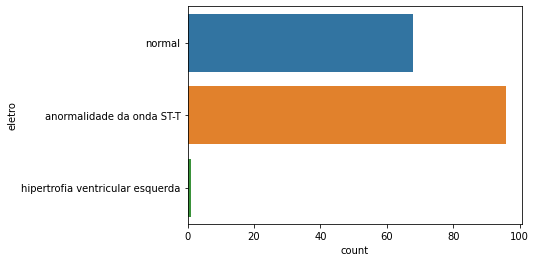

In [ ]:
sns.countplot(data=tendencia_infarto, y='eletro')

No gráfico abaixo há uma comparação entre os pacientes que receberam diagnóstico positivo (1) e negativo (0) com base em sua idade e frequência cardíaca.

Nota-se que há uma queda da frequência cardíaca ao decorrer dos anos para os pacientes com doenças cardíacas.

Uma das possíveis causas da alteração da frequência cardíaca é a arritmia cardíaca.

As arritmias podem ser benignas e malignas. Indivíduos que apresentam problemas no músculo cardíaco, como infarto, cicatrizes de inflamações, doença nas artérias coronárias e insuficiência cardíaca, estão no grupo de maior risco (Sobrac, 2017).

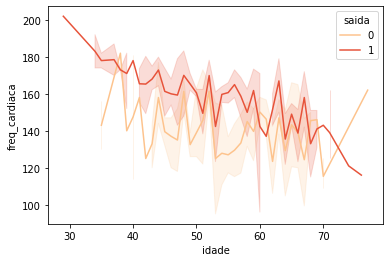

In [ ]:
pal = sns.color_palette('OrRd', 2)
sns.lineplot(data=df, y='freq_cardiaca', x='idade', hue='saida', palette=pal)

Os pacientes com doenças cardíacas apresentam um número menor de vasos visíveis em exames de fluoroscopia

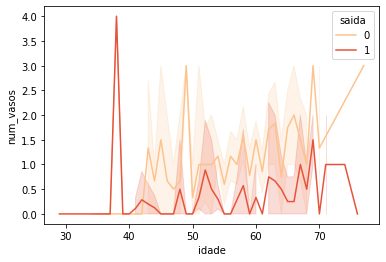

In [ ]:
sns.lineplot(data=df, y='num_vasos', x='idade', hue='saida', palette=pal)

# Criação de um modelo para diagnóstico preventivo

Com o intuito de desenvolver um sistema capaz de classificar se um indivíduo é propício a ter algum ataque cardíaco, utilizou-se a biblioteca skleanr, a qual possui muitos modelos já existentes de aprendizado de máquina, tendo seu projeto iniciado em 2007 como um projeto Google Summer of Code de David Cournapeau (Scikit-learn, 2007).



O primeiro passo foi realizar a divisão do dataframe em dois arrays, sendo eles, previsores, o qual possui as entradas do dataset, e as classes, que indica a saída, como comentado anteriormente, além de utilizarmos a função fit_transform, presente na biblioteca StandardScaler, a fim de pré-processar todos os dados.

Após essa etapa, utilizou-se a função train test split para dividir o dataset em duas partes, sendo elas o conjunto de treino, o qual represente 70% do total de amostras, e o conjunto de teste, com 30% do total.

In [ ]:
previsores = df_copy.iloc[:,0:13].values
classe = df_copy.iloc[:,13:14].values

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores) 

X_train, X_test, y_train, y_test = train_test_split(previsores,classe, test_size=0.3, random_state=2)

Com a conclusão das etapas iniciais, gerou-se 5 modelos diferentes de aprendizado de máquina, com o intiito de analisar qual o modelo que melhor performou com o conjunto de dados apresentados, além de utilizar a função cross_validade, a qual realiza a validação cruzada dos dados de treino e teste, aumentando ainda mais os resultados dos modelos.

Para comparar os modelos, utilizou-se as métricas de avaliação como parâmetro, sendo elas a acurácia, precisão e log loss, exibindo seus valores tanto antes da realização da validação cruzada, quanto após sua utilização.

In [ ]:
def svmCla(X_train, X_test, y_train, y_test, previsores, classe):
    modelo = 'SVM'
    print('Modelo ', modelo)
    svm = SVC()
    svm.fit(X_train, y_train.ravel())
    previsoes = svm.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)
    
    svm = SVC(probability= True)
    cv_results = cross_validate(svm, previsores, classe.ravel(), cv = 10, scoring=('neg_log_loss', 
                                                                                     'accuracy',
                                                                                     'precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

    return(modelo, acuracia, log, precision, 
           cv_results['test_accuracy'].max(), cv_results['test_neg_log_loss'].max(), cv_results['test_precision'].max())


def knnC(X_train, X_test, y_train, y_test, previsores, classe):
    modelo = 'KNN'
    print('Modelo ', modelo)
    knn = KNeighborsClassifier(n_neighbors = 2,  weights = 'uniform')
    knn.fit(X_train, y_train.ravel())
    previsoes = knn.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)

    knn = KNeighborsClassifier(n_neighbors = 2,  weights = 'uniform')
    cv_results = cross_validate(knn, previsores, classe.ravel(), cv = 10, scoring=('neg_log_loss', 
                                                                               'accuracy',
                                                                               'precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

    return(modelo, acuracia, log, precision, 
           cv_results['test_accuracy'].max(), cv_results['test_neg_log_loss'].max(), cv_results['test_precision'].max())


def reg(X_train, X_test, y_train, y_test, previsores, classe):
    modelo = 'Regressão Logistica'
    print('Modelo ', modelo)
    regre = LogisticRegression(C=0.1)
    regre.fit(X_train, y_train.ravel())
    previsoes = regre.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)

    regre = LogisticRegression(C=0.1)
    cv_results = cross_validate(regre, previsores, classe.ravel(), cv = 10, scoring=('neg_log_loss', 
                                                                                     'accuracy',
                                                                                     'precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

    return(modelo, acuracia, log, precision, 
           cv_results['test_accuracy'].max(), cv_results['test_neg_log_loss'].max(), cv_results['test_precision'].max())

    

def arvoreCla(X_train, X_test, y_train, y_test, previsores, classe):
    modelo = 'Arvore de Classificação'
    print('Modelo ', modelo)
    arvore = DecisionTreeClassifier(criterion='entropy')#gini)
    arvore.fit(X_train, y_train.ravel())
    previsoes = arvore.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)

    arvore = DecisionTreeClassifier(criterion='entropy')#gini)
    cv_results = cross_validate(arvore, previsores, classe.ravel(), cv = 10, scoring=('neg_log_loss', 
                                                                               'accuracy',
                                                                               'precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

    return(modelo, acuracia, log, precision, 
           cv_results['test_accuracy'].max(), cv_results['test_neg_log_loss'].max(), cv_results['test_precision'].max())



def florestaCla(X_train, X_test, y_train, y_test, previsores, classe):
    modelo = 'Random Forest'
    print('Modelo ', modelo)
    floresta = RandomForestClassifier(n_estimators=10, criterion='entropy')
    floresta.fit(X_train, y_train.ravel())
    previsoes = floresta.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)

    floresta = RandomForestClassifier(n_estimators=10, criterion='entropy')
    cv_results = cross_validate(floresta, previsores, classe.ravel(), cv = 10, scoring=('neg_log_loss', 
                                                                               'accuracy',
                                                                               'precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

    return(modelo, acuracia, log, precision, 
           cv_results['test_accuracy'].max(), cv_results['test_neg_log_loss'].max(), cv_results['test_precision'].max())

col_modelo = []
col_acuracia = []
col_log_loss = []
col_precisao = []
col_cross_acuracia = []
col_cross_log_loss = []
col_cross_precisao = []

modelo, acuracia, res_log_loss, precisao, cross_acuracia, cross_res_log_loss, cross_precisao = arvoreCla(X_train, X_test, y_train, y_test, previsores, classe)
col_modelo.append(modelo)
col_acuracia.append(acuracia)
col_log_loss.append(res_log_loss)
col_precisao.append(precisao)
col_cross_acuracia.append(cross_acuracia)
col_cross_log_loss.append(cross_res_log_loss)
col_cross_precisao.append(cross_precisao)


modelo, acuracia, res_log_loss, precisao, cross_acuracia, cross_res_log_loss, cross_precisao = florestaCla(X_train, X_test, y_train, y_test, previsores, classe)
col_modelo.append(modelo)
col_acuracia.append(acuracia)
col_log_loss.append(res_log_loss)
col_precisao.append(precisao)
col_cross_acuracia.append(cross_acuracia)
col_cross_log_loss.append(cross_res_log_loss)
col_cross_precisao.append(cross_precisao)


modelo, acuracia, res_log_loss, precisao, cross_acuracia, cross_res_log_loss, cross_precisao = reg(X_train, X_test, y_train, y_test, previsores, classe)
col_modelo.append(modelo)
col_acuracia.append(acuracia)
col_log_loss.append(res_log_loss)
col_precisao.append(precisao)
col_cross_acuracia.append(cross_acuracia)
col_cross_log_loss.append(cross_res_log_loss)
col_cross_precisao.append(cross_precisao)

modelo, acuracia, res_log_loss, precisao, cross_acuracia, cross_res_log_loss, cross_precisao = svmCla(X_train, X_test, y_train, y_test, previsores, classe)
col_modelo.append(modelo)
col_acuracia.append(acuracia)
col_log_loss.append(res_log_loss)
col_precisao.append(precisao)
col_cross_acuracia.append(cross_acuracia)
col_cross_log_loss.append(cross_res_log_loss)
col_cross_precisao.append(cross_precisao)

modelo, acuracia, res_log_loss, precisao, cross_acuracia, cross_res_log_loss, cross_precisao = knnC(X_train, X_test, y_train, y_test, previsores, classe)
col_modelo.append(modelo)
col_acuracia.append(acuracia)
col_log_loss.append(res_log_loss)
col_precisao.append(precisao)
col_cross_acuracia.append(cross_acuracia)
col_cross_log_loss.append(cross_res_log_loss)
col_cross_precisao.append(cross_precisao)

data = list(zip(col_modelo, col_acuracia, col_log_loss, col_precisao,col_cross_acuracia,col_cross_log_loss,col_cross_precisao))
   
df_resultados = pd.DataFrame(data,
                  columns = ['Modelo','Acuracia', 'Log_Loss', 'Precisao', 'Cross_Acuracia', 'Cross_Log_Loss', 'Cross_Precisao'],
                  index = col_modelo)

Modelo  Arvore de Classificação
acurácia:  0.8021978021978022
log loss  6.8318986010216864
precisão  0.88
CV_scores:
   acurácia:  0.8387096774193549
   log loss:  -5.570821973206897
   precisão:  0.875
Modelo  Random Forest
acurácia:  0.8571428571428571
log loss  4.934163634268352
precisão  0.88
CV_scores:
   acurácia:  0.8709677419354839
   log loss:  -0.3002945304562719
   precisão:  0.875
Modelo  Regressão Logistica
acurácia:  0.8681318681318682
log loss  4.5545814937778974
precisão  0.96
CV_scores:
   acurácia:  0.8709677419354839
   log loss:  -0.3010003857597288
   precisão:  0.9230769230769231
Modelo  SVM
acurácia:  0.8791208791208791
log loss  4.175043287212177
precisão  0.94
CV_scores:
   acurácia:  0.9333333333333333
   log loss:  -0.2901399245001138
   precisão:  1.0
Modelo  KNN
acurácia:  0.8131868131868132
log loss  6.452413115165651
precisão  0.74
CV_scores:
   acurácia:  0.8387096774193549
   log loss:  -2.395058023564052
   precisão:  1.0


# Resultados


Para analisar o desempenho dos modelos criados, gerou-se um dataframe com os valores obtidos de desempenho com e sem validação cruzada ordenando-os por sua acurácia.

In [ ]:
df_sem_cross = df_resultados[['Acuracia', 'Precisao', 'Log_Loss']].sort_values(by=['Acuracia'])
print(df_sem_cross)

df_cross = df_resultados[['Cross_Acuracia', 'Cross_Precisao', 'Cross_Log_Loss']].sort_values(by=['Cross_Acuracia'])
print(df_cross)


                         Acuracia  Precisao  Log_Loss
Arvore de Classificação  0.802198      0.88  6.831899
KNN                      0.813187      0.74  6.452413
Random Forest            0.857143      0.88  4.934164
Regressão Logistica      0.868132      0.96  4.554581
SVM                      0.879121      0.94  4.175043
                         Cross_Acuracia  Cross_Precisao  Cross_Log_Loss
Arvore de Classificação        0.838710        0.875000       -5.570822
KNN                            0.838710        1.000000       -2.395058
Random Forest                  0.870968        0.875000       -0.300295
Regressão Logistica            0.870968        0.923077       -0.301000
SVM                            0.933333        1.000000       -0.290140


Apenas para melhor visualizar os resultados obtidos, normalizou-se de 0 à 1 os valores de Log Loss e plotou-se os gráficos dos cinco modelos com as três métricas analisadas.

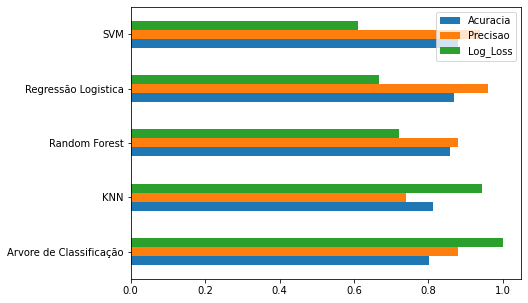

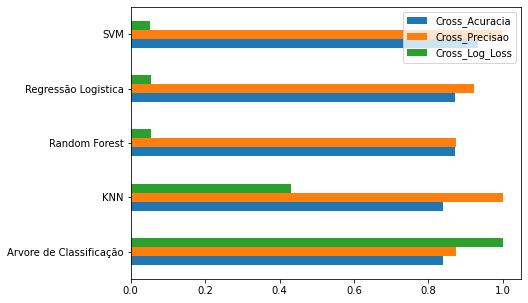

In [ ]:
def normalizar_log_loss(df):
    df = df * -1
    return((df) / (df.max()))


df_sem_cross[['Log_Loss']] = df_sem_cross[['Log_Loss']]/(df_sem_cross[['Log_Loss']].max())
df_cross[['Cross_Log_Loss']] = normalizar_log_loss(df_cross[['Cross_Log_Loss']])

df_sem_cross.plot(kind='barh', legend=True, figsize=(7,5))
df_cross.plot(kind='barh', legend=True, figsize=(7,5))

Analisando os cinco modelos obtidos anteriormente, pode-se notar que os modelos que melhor aprensentaram resultados sem a validação cruzada foram os modelos de Suporte Vector Machine (SVM) e Regressão Logística tendo uma acurácia próxima de 88% e 87%, além de uma precisão de 96% e 94%, respectivamente, e ambos com os menores valores positivos de Log Loss.

Ao analisar os desempenhos após a validação cruzada, utilizando 10 como número de *folds*, vemos que ocorre uma mudança no *ranking* de modelos, no qual, o SVM apresenta os melhores valores em relação aos demais, tendo uma acurácia de 93%, uma precisão de 100% e o menor log loss, em -0,28, seguido do modelo de Random Forest, tendo como resultados a acurácia de 90%, 100% de precisão, assim como o SVM, e um log loss de -0,30.

# Conclusão

Com o trabalho proprosto, consegui-se analisar um dataset contendo informações de pessoas com diferentes características, as quais possuem ou não problemas cardíacos, utilizando técnicas de estatística e inteligência artificial, com o intúito de conseguir prever se uma pessoa é propensa a desenvolver esse tipo de doença.

Treinou-se cinco diferentes modelos de IA, tendo como melhor resultado, uma acurácia de 93% e uma precisão de 100% através do algorítimo de *Suporte Vector Machine* com validação cruzada.

Segundo Netto, as soluções que se baseiam em ciência de dados em saúde podem reformular a indústria de medicamentos e operadoras de saúde, descobrir novos insights e transformar ideias corajosas em realidade.

Acredita-se que com uma maior quantidade de dados, consegue-se obter uma melhor acurácia, porém os resultados apresentados são satisfatórios, os quais podem ajudar a prever doenças cardíacas e auxiliar no tratamento de pacientes.



# Referências

SWEIS, R. N. **Angina de peito**. Disponível em: <https://www.msdmanuals.com/pt-br/profissional/doen%C3%A7as-cardiovasculares/doen%C3%A7a-coronariana/angina-de-peito>. Acesso em: 07/2021.

MICHOS, E. D. **Why Cholesterol Matters for Women**. Disponível em: <https://www.hopkinsmedicine.org/health/wellness-and-prevention/why-cholesterol-matters-for-women>. Acesso em: 07/2021.

WEBER, J. V. **Supradesnivelamento de ST: diagnósticos diferenciais**. Disponível em: <https://www.sanarmed.com/supradesnivelamento-de-st-diagnosticos-diferenciais-colunistas>. Acesso em: 07/2021.

Sobrac. Arritimias cardíacas: 10 informalçoes úteis para seu coração bater no ritmo certo. Disponível em: <https://sobrac.org/publico-geral/?p=4463>. Acesso em: 07/2021.

**Scikit-Learn Project**. Disponível em: <https://scikit-learn.org/stable/about.html>. Acesso em: 07/2021.

NETTO, A. V. **Quando a área de saúde encontra a ciência dos dados**. Disponível em: <https://academiamedica.com.br/blog/quando-a-area-de-saude-encontra-a-ciencia-dos-dados>. Acesso em: 07/2021.

Laboissière, P. OMS: 17,5 milhões de pessoas morrem todos os anos de doenças cardiovasculares. Disponível em: <https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/oms-175-milhoes-de-pessoas-morrem-todos-os-anos-de-doencas-cardiovasculares>. Acesso em: 05/2021.

UFMA. Infarto mata mais de 70 mil brasileiros por ano. Disponível em: <https://www.unasus.ufma.br/?p=1662>. Acesso em: 05/2021.

